## Práctica: Espacio ultramétrico - Algoritmo ABC -Algoritmo AC - Algoritmo de Ward

### Iván López de Munain Quintana

### Algoritmo ABC

In [2]:
import numpy as np
U = [
    [0, 0.2, 0.2, 0.35, 0.35],
    [0.2, 0, 0.15, 0.35, 0.35],
    [0.2, 0.15, 0, 0.35, 0.35],
    [0.35, 0.35, 0.35, 0, 0.1],
    [0.35, 0.35, 0.35, 0.1, 0]
]

#contador
a=0

#vemos que son tres iteraciones 
while a < 3:
    minimo=999
    for i in range(5-a):
        for j in range(5-a):
            #si es cero ignoramos la distancia
            if U[i][j]!=0:
                if minimo > U[i][j]:
                    #encontramos el minimo
                    minimo=U[i][j]
                    imin=i
                    jmin=j  
                    
    # para ver la relacion de los clusters 
    # (tener en cuenta que los indices cambian, pero es el mismo resultado que el obtenido de forma automatica a continuacion)
    print("Cluster ",imin," con cluster ",jmin)
                    
    #borramos fila y columna
    U= np.delete(U,(imin),axis=0)   
    U= np.delete(U,(imin),axis=1)
    a +=1


#matriz resultante
print(U)

Cluster  3  con cluster  4
Cluster  1  con cluster  2
Cluster  0  con cluster  1
[[0.   0.35]
 [0.35 0.  ]]


### Dendograma

C:\Users\Iván\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


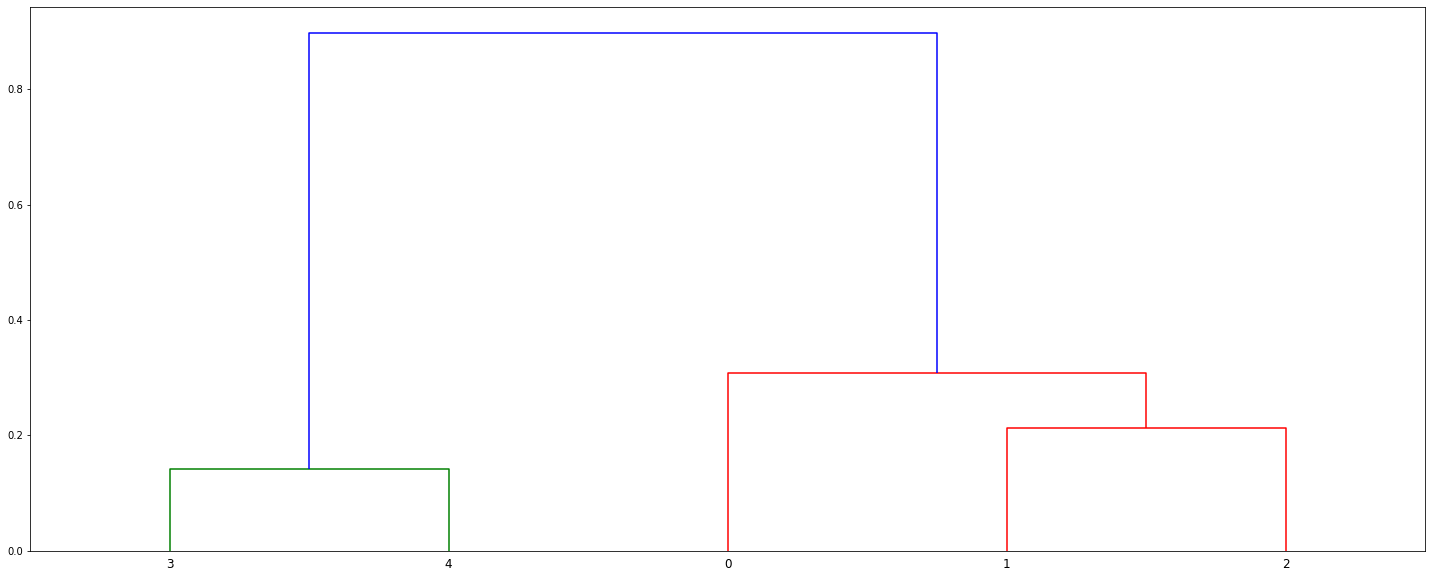

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
U = [
    [0, 0.2, 0.2, 0.35, 0.35],
    [0.2, 0, 0.15, 0.35, 0.35],
    [0.2, 0.15, 0, 0.35, 0.35],
    [0.35, 0.35, 0.35, 0, 0.1],
    [0.35, 0.35, 0.35, 0.1, 0]
]

#se obtiene el dendograma de forma automatica pero mediante el algoritmo ABC implementado antes
# se puede ver como se obtiene el mismo resultado (se ve en los prints)

Z = linkage(U, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

### Algoritmo AC - Mínimo

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from scipy.spatial import distance as ssd



# primero lo hacemos a mano
D = np.array([[0,1,3,4,7],
            [1,0,4,4,8],
            [3,4,0,2,8],
            [4,4,2,0,7],
            [7,8,8,7,0]])
print("Primera agrupacion:", D)

D= np.array([[0,3,4,7],
            [3,0,2,8],
            [4,2,0,7],
            [7,8,7,0]])
             
print("Segunda agrupacion:",D)

D= np.array([[0,3,7],
            [3,0,7],
            [7,7,0]])
print("Tercera agrupacion:",D)
D= np.array([[0,7],
            [7,0]])  
    
print("Cuarta agrupacion:",D) 



        

Primera agrupacion: [[0 1 3 4 7]
 [1 0 4 4 8]
 [3 4 0 2 8]
 [4 4 2 0 7]
 [7 8 8 7 0]]
Segunda agrupacion: [[0 3 4 7]
 [3 0 2 8]
 [4 2 0 7]
 [7 8 7 0]]
Tercera agrupacion: [[0 3 7]
 [3 0 7]
 [7 7 0]]
Cuarta agrupacion: [[0 7]
 [7 0]]


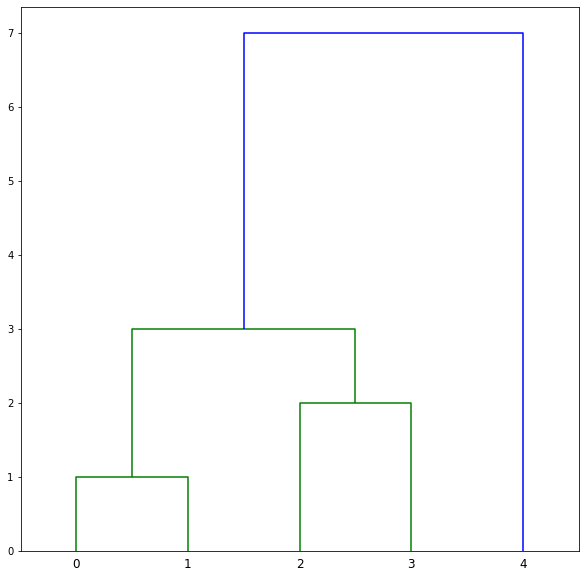

In [4]:
linkage= np.array([
    [0,1,1,2],
    [2,3,2,2],
    [5,6,3,4],
    [7,4,7,5]
], dtype="float")

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(linkage)
plt.show()

[[0. 1. 1. 2.]
 [2. 3. 2. 2.]
 [5. 6. 3. 4.]
 [4. 7. 7. 5.]]


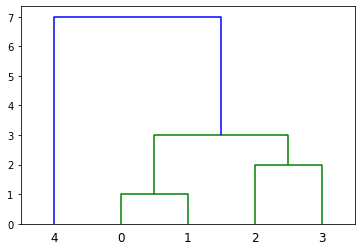

In [79]:
## Ahora de forma automatica

D = np.array([[0,1,3,4,7],
            [1,0,4,4,8],
            [3,4,0,2,8],
            [4,4,2,0,7],
            [7,8,8,7,0]])

#te saca la matriz triangular puesto que es simetrica
dist = ssd.squareform(D)

#single es el del minimo
linkage_matrix = linkage(dist, "single")
print(linkage_matrix)

dendrogram(linkage_matrix)
plt.show()

### Algoritmo AC - Máximo

In [66]:
# primero lo hacemos a mano
D = np.array([[0,1,3,4,7],
            [1,0,4,4,8],
            [3,4,0,2,8],
            [4,4,2,0,7],
            [7,8,8,7,0]])
print("Primera agrupacion:", D)

D= np.array([[0,4,4,8],
            [4,0,2,8],
            [4,2,0,7],
            [7,8,7,0]])
             
print("Segunda agrupacion:",D)

D= np.array([[0,4,8],
            [4,0,8],
            [8,8,0]])
print("Tercera agrupacion:",D)
D= np.array([[0,8],
            [8,0]])  
    
print("Cuarta agrupacion:",D) 

Primera agrupacion: [[0 1 3 4 7]
 [1 0 4 4 8]
 [3 4 0 2 8]
 [4 4 2 0 7]
 [7 8 8 7 0]]
Segunda agrupacion: [[0 4 4 8]
 [4 0 2 8]
 [4 2 0 7]
 [7 8 7 0]]
Tercera agrupacion: [[0 4 8]
 [4 0 8]
 [8 8 0]]
Cuarta agrupacion: [[0 8]
 [8 0]]


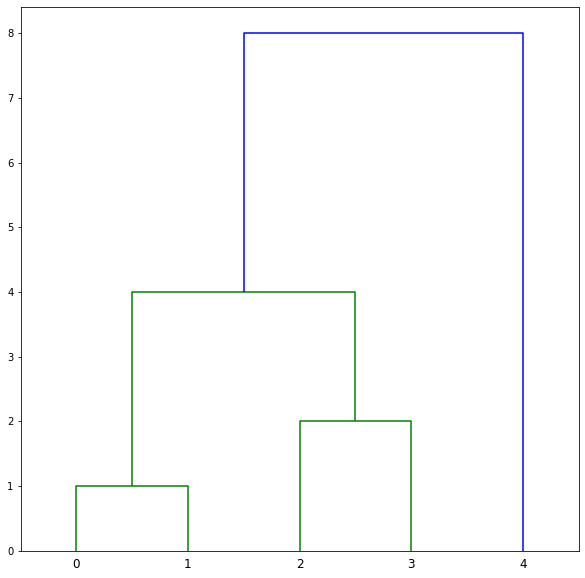

In [67]:
linkage= np.array([
    [0,1,1,2],
    [2,3,2,2],
    [5,6,4,4],
    [7,4,8,5]
], dtype="float")

fig = plt.figure(figsize=(10, 10))
dn = dendrogram(linkage)
plt.show()

[[0. 1. 1. 2.]
 [2. 3. 2. 2.]
 [5. 6. 4. 4.]
 [4. 7. 8. 5.]]


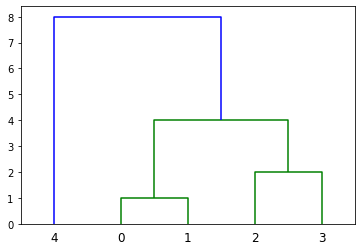

In [80]:


## Ahora de forma automatica

D = np.array([[0,1,3,4,7],
            [1,0,4,4,8],
            [3,4,0,2,8],
            [4,4,2,0,7],
            [7,8,8,7,0]])

#te saca la matriz triangular puesto que es simetrica
dist = ssd.squareform(D)

#complete es el del maximo
linkage_matrix = linkage(dist, "complete")
print(linkage_matrix)

dendrogram(linkage_matrix)
plt.show()

### Algoritmo de Ward

In [14]:
import math
#ejercicio calculado a mano

X= np. array([
    [1,2],
    [2,1],
    [2,2.7],
    [5,3],
    [6.5,2],
    [7,3]
])

        
centroide = np.zeros(shape=(15,2))
k=0
for i in range(6):
    for j in range(i+1,6):
        centroide[k,0]= (X[i,0]+X[j,0])/2
        centroide[k,1]= (X[i,1]+X[j,1])/2
        k+=1

#lo siguiente podia haberse automatizado pero se pedia realizarlo a mano por lo que tan solo he incluido la primera
#iteracion, el resto lo he hecho en papel
heter01 = math.pow((X[0,0]-centroide[0,0]),2) + math.pow((X[0,1]-centroide[0,1]),2) + math.pow((X[1,0]-centroide[0,0]),2) + math.pow((X[1,1]-centroide[0,1]),2)      
heter02 = math.pow((X[0,0]-centroide[1,0]),2) + math.pow((X[0,1]-centroide[1,1]),2) + math.pow((X[2,0]-centroide[1,0]),2) + math.pow((X[2,1]-centroide[1,1]),2)      
heter03 = math.pow((X[0,0]-centroide[2,0]),2) + math.pow((X[0,1]-centroide[2,1]),2) + math.pow((X[3,0]-centroide[2,0]),2) + math.pow((X[3,1]-centroide[2,1]),2)      
heter04 = math.pow((X[0,0]-centroide[3,0]),2) + math.pow((X[0,1]-centroide[3,1]),2) + math.pow((X[4,0]-centroide[3,0]),2) + math.pow((X[4,1]-centroide[3,1]),2)      
heter05 = math.pow((X[0,0]-centroide[4,0]),2) + math.pow((X[0,1]-centroide[4,1]),2) + math.pow((X[5,0]-centroide[4,0]),2) + math.pow((X[5,1]-centroide[4,1]),2)      
heter12 = math.pow((X[1,0]-centroide[5,0]),2) + math.pow((X[1,1]-centroide[5,1]),2) + math.pow((X[2,0]-centroide[5,0]),2) + math.pow((X[2,1]-centroide[5,1]),2)      
heter13 = math.pow((X[1,0]-centroide[6,0]),2) + math.pow((X[1,1]-centroide[6,1]),2) + math.pow((X[3,0]-centroide[6,0]),2) + math.pow((X[3,1]-centroide[6,1]),2)      
heter14 = math.pow((X[1,0]-centroide[7,0]),2) + math.pow((X[1,1]-centroide[7,1]),2) + math.pow((X[4,0]-centroide[7,0]),2) + math.pow((X[4,1]-centroide[7,1]),2)      
heter15 = math.pow((X[1,0]-centroide[8,0]),2) + math.pow((X[1,1]-centroide[8,1]),2) + math.pow((X[5,0]-centroide[8,0]),2) + math.pow((X[5,1]-centroide[8,1]),2)      
heter23 = math.pow((X[2,0]-centroide[9,0]),2) + math.pow((X[2,1]-centroide[9,1]),2) + math.pow((X[3,0]-centroide[9,0]),2) + math.pow((X[3,1]-centroide[9,1]),2)      
heter24 = math.pow((X[2,0]-centroide[10,0]),2) + math.pow((X[2,1]-centroide[10,1]),2) + math.pow((X[4,0]-centroide[10,0]),2) + math.pow((X[4,1]-centroide[10,1]),2)      
heter25 = math.pow((X[2,0]-centroide[11,0]),2) + math.pow((X[2,1]-centroide[11,1]),2) + math.pow((X[5,0]-centroide[11,0]),2) + math.pow((X[5,1]-centroide[11,1]),2)      
heter34 = math.pow((X[3,0]-centroide[12,0]),2) + math.pow((X[3,1]-centroide[12,1]),2) + math.pow((X[4,0]-centroide[12,0]),2) + math.pow((X[4,1]-centroide[12,1]),2)      
heter35 = math.pow((X[3,0]-centroide[13,0]),2) + math.pow((X[3,1]-centroide[13,1]),2) + math.pow((X[5,0]-centroide[13,0]),2) + math.pow((X[5,1]-centroide[13,1]),2)      
heter45 = math.pow((X[4,0]-centroide[14,0]),2) + math.pow((X[4,1]-centroide[14,1]),2) + math.pow((X[5,0]-centroide[14,0]),2) + math.pow((X[5,1]-centroide[14,1]),2)      

minimo=min(heter01,heter02,heter03,heter04,heter05,heter12,heter13,heter14,heter15,heter23,heter24, heter25, heter34, heter35, heter45)

print(heter45)



0.625
0.625


Podemos ver que con el caso de agrupar la observación 4 con la 5 se obtiene la menor heterocedasticidad, entonces uniríamos esos dos formando el primer cluster. Como se pedía realizar a mano, aquí tan solo he mostrado la primera iteración, los cálculos posteriores serían análogos. A continuación vemos con scipy cómo las primeras observaciones en juntarse son la 4 y la 5 (coincide con lo hecho a mano).

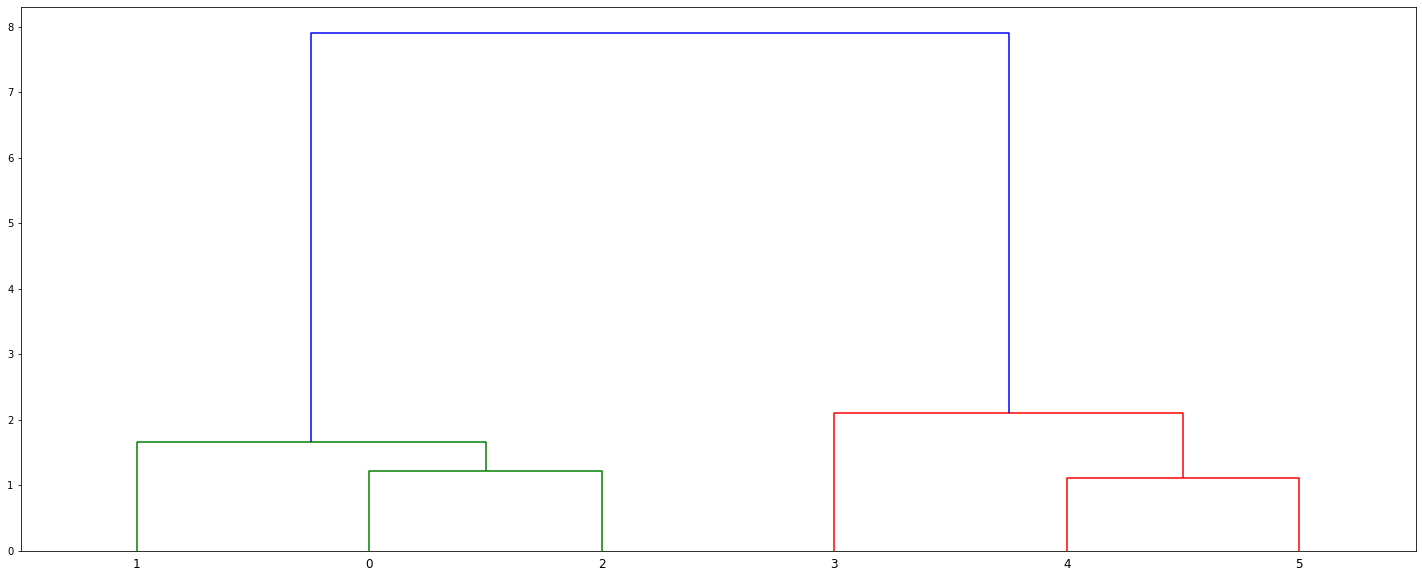

In [75]:
#mediante modulos implementados

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

Z = linkage(X, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()

In [59]:
from sklearn.cluster import AgglomerativeClustering

#algoritmo de Ward para un número de clusters de 3 (dendograma mostrado justo arriba)
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward")
clustering.fit_predict(X)

array([0, 0, 0, 2, 1, 1], dtype=int64)

### Comparativas con el dataset IRIS

In [76]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import minmax_scale, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import mode
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import KMeans

iris= load_iris()
y=iris.target
x=iris.data[:,:2]

#x = minmax_scale(x)
#normalizar
normalizar = StandardScaler()
x= normalizar.fit_transform(iris.data)

skf = StratifiedKFold(n_splits=10,random_state=1)
skf.get_n_splits(x, y)

acumulWard=np.empty(13)
acumulMin=np.empty(13)
acumulMax=np.empty(13)
acumulMedia=np.empty(13)

acumulKmeans=np.empty(13)

for k in range(3,16):
    
        #para k-medias, cross-validation estratificado
        for train_index, test_index in skf.split(x,y):

            x_train, x_test = x[train_index], x[test_index]
            y_train, y_test = y[train_index], y[test_index]

            kmedias = KMeans(n_clusters=k).fit(x_train)
            etiquetas = kmedias.labels_
            prediction=kmedias.predict(x_test)


            modaKmeans= np.empty(k)
            for j in range(0,k):
                modaKmeans[j] = np.max(y_train[np.where(etiquetas==j)])

            claseBase=np.empty(len(y_test))
            for q in range(len(y_test)):
                claseBase[q]=modaKmeans[prediction[q]]


            aciertosKmeans = 0
            for i in range(len(y_test)):
                if claseBase[i]==y_test[i]:
                    aciertosKmeans+=1

            tasa_aciertos = aciertosKmeans/len(y_test)
            acumulKmeans[k-3]+=tasa_aciertos
        
        clusteringWard = AgglomerativeClustering(n_clusters=k, linkage="ward")
        clusteringWard.fit(x)
        
        clusteringMin = AgglomerativeClustering(n_clusters=k, linkage="single")
        clusteringMin.fit(x)
        
        clusteringMax = AgglomerativeClustering(n_clusters=k, linkage="complete")
        clusteringMax.fit(x)
        
        clusteringMedia = AgglomerativeClustering(n_clusters=k, linkage="average")
        clusteringMedia.fit(x)
 
        modaWard= -1*np.ones(k,dtype='float')
        modaMin= -1*np.ones(k,dtype='float')
        modaMax= -1*np.ones(k,dtype='float')
        modaMedia= -1*np.ones(k,dtype='float')
    
    
        for j in range(0,k):
            modaWard[j] = mode(y[np.argwhere(clusteringWard.labels_ == j)])[0].astype('int')
            modaMin[j] = mode(y[np.argwhere(clusteringMin.labels_ == j)])[0].astype('int')
            modaMax[j] = mode(y[np.argwhere(clusteringMax.labels_ == j)])[0].astype('int')
            modaMedia[j] = mode(y[np.argwhere(clusteringMedia.labels_ == j)])[0].astype('int')

        yPredictWard = modaWard[clusteringWard.labels_]
        yPredictMin = modaMin[clusteringMin.labels_]
        yPredictMax = modaMax[clusteringMax.labels_]
        yPredictMedia = modaMedia[clusteringMedia.labels_]
        
        aciertosWard = 0
        aciertosMin = 0
        aciertosMax = 0
        aciertosMedia = 0
        for i in range(len(y)):
            if yPredictWard[i]==y[i]:
                aciertosWard+=1
            if yPredictMin[i]==y[i]:
                aciertosMin+=1
            if yPredictMax[i]==y[i]:
                aciertosMax+=1
            if yPredictMedia[i]==y[i]:
                aciertosMedia+=1

        acumulWard[k-3] = aciertosWard/len(y)
        acumulMin[k-3] = aciertosMin/len(y)
        acumulMax[k-3] = aciertosMax/len(y)
        acumulMedia[k-3] = aciertosMedia/len(y)
        
print("Kmeans:\n")
for a in range(3,11):
    print("Tasa de aciertos para", a , "clusters : ", round(acumulKmeans[a-3]/skf.get_n_splits(x, y),3), "%")
print("\nAglomerativo Ward:\n")
for a in range(3,16):
    print("Tasa de aciertos para", a , "clusters : ", round(acumulWard[a-3],3), "%")
print("\nAglomerativo Minimo:\n")
for a in range(3,16):
    print("Tasa de aciertos para", a , "clusters : ", round(acumulMin[a-3],3), "%")
print("\nAglomerativo Maximo:\n")
for a in range(3,16):
    print("Tasa de aciertos para", a , "clusters : ", round(acumulMax[a-3],3), "%")
print("\nAglomerativo Average:\n")
for a in range(3,16):
    print("Tasa de aciertos para", a , "clusters : ", round(acumulMedia[a-3],3), "%")


Kmeans:

Tasa de aciertos para 3 clusters :  0.735 %
Tasa de aciertos para 4 clusters :  0.735 %
Tasa de aciertos para 5 clusters :  0.745 %
Tasa de aciertos para 6 clusters :  0.738 %
Tasa de aciertos para 7 clusters :  0.755 %
Tasa de aciertos para 8 clusters :  0.768 %
Tasa de aciertos para 9 clusters :  0.808 %
Tasa de aciertos para 10 clusters :  0.808 %

Aglomerativo Ward:

Tasa de aciertos para 3 clusters :  0.827 %
Tasa de aciertos para 4 clusters :  0.833 %
Tasa de aciertos para 5 clusters :  0.833 %
Tasa de aciertos para 6 clusters :  0.833 %
Tasa de aciertos para 7 clusters :  0.833 %
Tasa de aciertos para 8 clusters :  0.833 %
Tasa de aciertos para 9 clusters :  0.833 %
Tasa de aciertos para 10 clusters :  0.893 %
Tasa de aciertos para 11 clusters :  0.893 %
Tasa de aciertos para 12 clusters :  0.927 %
Tasa de aciertos para 13 clusters :  0.927 %
Tasa de aciertos para 14 clusters :  0.933 %
Tasa de aciertos para 15 clusters :  0.933 %

Aglomerativo Minimo:

Tasa de aciertos

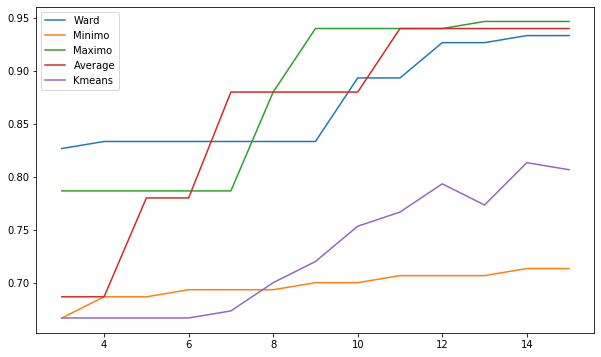

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
plt.plot(np.arange(3,15+1,dtype='int'),acumulWard, label="Ward")
plt.plot(np.arange(3,15+1,dtype='int'),acumulMin, label="Minimo")
plt.plot(np.arange(3,15+1,dtype='int'),acumulMax, label="Maximo")
plt.plot(np.arange(3,15+1,dtype='int'),acumulMedia, label = "Average")
plt.plot(np.arange(3,15+1,dtype='int'),acumulKmeans/skf.get_n_splits(x, y), label = "Kmeans")
plt.legend()
plt.show()

Podemos observar cómo los mejores resultados se obtienen con Ward, Average y Máximo, mientras que los peores con el Mínimo. Con Kmeans se obtienen resultados intermedios, entorno al 75% (hay que tener en cuenta que con Kmeans se realiza validación cruzada estratificada).